Dated Changed: 2021-10-21

## Import Packages

In [1]:
import sys
# sys.path.insert(0, '../../IDEaSv2')

In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import neurokit2 as nk
from scipy.stats import skew, kurtosis, iqr

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import classification_report
from feat_functions.main_utils import *

## Baseline Imputation

### Baseline of ECG

In [3]:
# Preparing Baseline data
# fixing flaw of missing values in ECG that will be dropped in above case but ideally should not be dropped.
main_path = r"X:\IDEaS\Full\June_11_2021"
ecg_sample_rt = 512
# eda_sample_rt = 128
subjects_id = os.listdir(main_path)
exp_id = ['baseline']
rd_cols = ['Timestamp', 'ECG LL-RA CAL',
           'ECG LA-RA CAL', 'ECG Vx-RL CAL']
for sub_id in range(len(subjects_id)):
    
    subject_path = os.path.join(main_path, subjects_id[sub_id], 'Sensor Data')
    print(subjects_id[sub_id])

    for xid in exp_id:
        try:
            if subjects_id[sub_id] == '1544' and (xid in ['exp_1', 'exp_3', 'exp_2']):
                # for exp_1 ECG recording was stopped after 2 mins :(
                # Shimmer ECG sensor was not configured for ECG; hence no ECG was recorded. 
                continue
            read_path = os.path.join(subject_path, '{}.csv'.format(xid))
            df = pd.read_csv(read_path, dtype='object')
            if df.columns[0] == '#INFO':
                df = pd.read_csv(read_path, skiprows = 32, skipinitialspace=True, usecols=rd_cols)
            else: 
                df = pd.read_csv(read_path, usecols=rd_cols)
            
            df.dropna(inplace=True) # removing all the nan rows
            df.reset_index(drop=True, inplace=True) # resetting the index after dropping nan rows
            # df['Timestamp'] = df['Timestamp'].astype('float') # converting the timestamps to float to make the data consistent

            # # creating a list of all timestamps that should have been there if there was no missing datapoints.
            # time_list = ([df.loc[0, 'Timestamp'] + (x * (1000/ecg_sample_rt)) for x in range(0, int((df.loc[df.index[-1], 'Timestamp'] - df.loc[0, 'Timestamp'])/(1000/ecg_sample_rt)) + 1)])
            
            # # creating a dataframe from the time_list that has all the timestamps (missing + not missing)
            # df_ecg = pd.DataFrame(time_list, columns = ['timestamp'])

            # # rounding the timestamps to 1 place decimal as then it would be more easier to compare timestamps!
            # df_ecg['timestamp'] = df_ecg['timestamp'].round(decimals = 1)
            # df_ecg.index = df_ecg['timestamp'] # shifting the timestamps to index

            # df['Timestamp'] = df['Timestamp'].round(decimals = 1)
            # df.index = df['Timestamp']

            # df_new = pd.concat([df_ecg, df], axis = 1)
            # df_new.drop(columns = ['Timestamp'], inplace=True)
            # df_new.reset_index(inplace=True, drop=True)

            # num_drops = df_new['ECG LL-RA CAL'].isna().sum()

            # if num_drops > len(df_new) * 0.45:
            #     print(xid)
            #     continue

            # df_ecg_new = impute_ecg(df_new)
            
            # # cleaning the ECG signals
            # df_ecg_new = ecg_cleaner(df_ecg_new)
            
            csv_path = r'X:\RealTimeSegment\MatbII\Raw\ECG_EDA_baseline\{}'.format(subjects_id[sub_id])
            
            mk_dirs(csv_path)
            df.to_csv(os.path.join(csv_path, 'ecg_{}.csv'.format(xid)), index=False)

        except FileNotFoundError:
            # exp_3 for subject 1674 was not recorded :(
            continue

1026
1105
1106
1175
1194
1337
1390
1400
1419
1517
1544
1624
1629
1674
1688
1717
1765
1818
1892
1929
1933
1936
1953
1981


### Baseline of EDA

In [4]:
main_path = r"X:\IDEaS\Full\June_11_2021"
# ecg_sample_rt = 512
eda_sample_rt = 128
subjects_id = os.listdir(main_path)
exp_id = ['baseline']
rd_cols = ['Timestamp', 'GSR Conductance CAL']
for sub_id in range(len(subjects_id)):
     
    subject_path = os.path.join(main_path, subjects_id[sub_id], 'Sensor Data')
    print(subjects_id[sub_id])
    
    for xid in exp_id:
        try:
            read_path = os.path.join(subject_path, '{}.csv'.format(xid))
            df = pd.read_csv(read_path, dtype='object')
            if df.columns[0] == '#INFO':
                df = pd.read_csv(read_path, skiprows = 32, skipinitialspace=True, usecols=rd_cols)
            else: 
                df = pd.read_csv(read_path, usecols=rd_cols)
            
            df.dropna(inplace=True)
            # df.reset_index(drop=True, inplace=True)
            # df['Timestamp'] = df['Timestamp'].astype('float')
            # time_list = ([df.loc[0, 'Timestamp'] + (x * (1000/eda_sample_rt)) for x in range(0, int((df.loc[df.index[-1], 'Timestamp'] - df.loc[0, 'Timestamp'])/(1000/eda_sample_rt)) + 1)])
            
            # df_eda = pd.DataFrame(time_list, columns = ['timestamp'])
            # df_eda['timestamp'] = df_eda['timestamp'].round(decimals = 1)
            # df_eda.index = df_eda['timestamp']

            # df['Timestamp'] = df['Timestamp'].round(decimals = 1)
            # df.index = df['Timestamp']

            # df_new = pd.concat([df_eda, df], axis = 1)
            # df_new.drop(columns = ['Timestamp'], inplace=True)
            # df_new.reset_index(inplace=True, drop=True)

            # num_drops = df_new['GSR Conductance CAL'].isna().sum()

            # if num_drops > len(df_new) * 0.45:
            #     print(xid)
            #     continue

            # df_eda_new = impute_eda(df_new)
            
            # # cleaning the EDA signals
            # df_eda_new = eda_cleaner(df_eda_new)
            # df_eda_new = eda_decom(df_eda_new)
            
            csv_path = r'X:\RealTimeSegment\MatbII\Raw\ECG_EDA_baseline\{}'.format(subjects_id[sub_id])
            
            mk_dirs(csv_path)
            df.to_csv(os.path.join(csv_path, 'eda_{}.csv'.format(xid)), index=False)

        except FileNotFoundError:
            # exp_3 for subject 1674 was not recorded :(
            continue

1026
1105
1106
1175
1194
1337
1390
1400
1419
1517
1544
1624
1629
1674
1688
1717
1765
1818
1892
1929
1933
1936
1953
1981


## Imputation of ECG and EDA signals

### Imputing ECG

In [4]:
# fixing flaw of missing values in ECG that will be dropped in above case but ideally should not be dropped.
main_path = r"X:\IDEaS\Full\June_11_2021"

ecg_sample_rt = 512
subjects_id = os.listdir(main_path)
exp_id = ['exp_0', 'exp_1', 'exp_2', 'exp_3']
rd_cols = ['Timestamp', 'ECG LL-RA CAL',
           'ECG LA-RA CAL', 'ECG Vx-RL CAL']
for sub_id in range(len(subjects_id)):
    
    subject_path = os.path.join(main_path, subjects_id[sub_id], 'Sensor Data')

    print(subjects_id[sub_id])

    for xid in exp_id:
        try:
            if subjects_id[sub_id] == '1544' and (xid in ['exp_1', 'exp_3', 'exp_2']):
                # for exp_1 ECG recording was stopped after 2 mins :(
                # Shimmer ECG sensor was not configured for ECG; hence no ECG was recorded. 
                continue
            # if subjects_id[sub_id] != '1544':
            #     continue
            read_path = os.path.join(subject_path, '{}.csv'.format(xid))
            df = pd.read_csv(read_path, dtype='object')
            if df.columns[0] == '#INFO':
                df = pd.read_csv(read_path, skiprows = 32, skipinitialspace=True, usecols=rd_cols)
            else: 
                df = pd.read_csv(read_path, usecols=rd_cols)
            
            df.dropna(inplace=True) # removing all the nan rows

            # df.drop(columns = ['Row', 'SampleNumber'], inplace = True) # dropping unnecessary columns from the dataframe
            df.reset_index(drop=True, inplace=True) # resetting the index after dropping nan rows
            df['Timestamp'] = df['Timestamp'].astype('float') # converting the timestamps to float to make the data consistent

            # creating a list of all timestamps that should have been there if there was no missing datapoints.
            time_list = ([df.loc[0, 'Timestamp'] + (x * (1000/ecg_sample_rt)) for x in range(0, int((df.loc[df.index[-1], 'Timestamp'] - df.loc[0, 'Timestamp'])/(1000/ecg_sample_rt)) + 1)])
            
            # creating a dataframe from the time_list that has all the timestamps (missing + not missing)
            df_ecg = pd.DataFrame(time_list, columns = ['timestamp'])

            # rounding the timestamps to 1 place decimal as then it would be more easier to compare timestamps!
            df_ecg['timestamp'] = df_ecg['timestamp'].round(decimals = 1)
            df_ecg.index = df_ecg['timestamp'] # shifting the timestamps to index

            df['Timestamp'] = df['Timestamp'].round(decimals = 1)
            df.index = df['Timestamp']

            df_new = pd.concat([df_ecg, df], axis = 1)
            df_new.drop(columns = ['Timestamp'], inplace=True)
            df_new.reset_index(inplace=True, drop=True)

            num_drops = df_new['ECG LL-RA CAL'].isna().sum()

            if num_drops > len(df_new) * 0.05:
                print(xid)
                continue

            df_ecg_new = impute_ecg(df_new.copy())
            # cleaning the ECG signals
            df_ecg_new_1 = ecg_cleaner(df_ecg_new.copy(), sample_rate=512.)
            ecg = downsample_me(df_ecg_new_1['ECG LL-RA CAL'], 512, 256)

            dfEcgDown = pd.DataFrame(ecg, columns=['ECG LL-RA'])

            csv_path = r'X:\Thesis\matb2\ECG_EDA\{}'.format(subjects_id[sub_id])
          
            mk_dirs(csv_path)
            dfEcgDown.to_csv(os.path.join(csv_path, 'ecg_{}.csv'.format(xid)), index=False)

        except FileNotFoundError:
            # exp_3 for subject 1674 was not recorded :(
            print('error!')
            continue
        # break

1026
exp_0
exp_1
exp_2
exp_3
1105
1106
1175
1194
1337
1390
1400
1419
1517
exp_3
1544
1624
exp_1
1629
exp_0
exp_1
exp_2
exp_3
1674
error!
1688
1717
exp_1
exp_3
1765
error!
1818
1892
1929
1933
exp_2
exp_3
1936
exp_0
exp_1
error!
exp_3
1953
exp_0
exp_1
exp_2
exp_3
1981
exp_0
exp_1
exp_2
exp_3


In [5]:
subjects_id[sub_id]

'1981'

### Imputing EDA

In [8]:
main_path = r"X:\IDEaS\Full\June_11_2021"
eda_sample_rt = 128
subjects_id = os.listdir(main_path)
exp_id = ['exp_0', 'exp_1', 'exp_2', 'exp_3']
rd_cols = ['Timestamp', 'GSR Conductance CAL']
for sub_id in range(len(subjects_id)):
    
    subject_path = os.path.join(main_path, subjects_id[sub_id], 'Sensor Data')
    print(subjects_id[sub_id])

    for xid in exp_id:
        try:
            read_path = os.path.join(subject_path, '{}.csv'.format(xid))
            df = pd.read_csv(read_path, dtype='object')
            if df.columns[0] == '#INFO':
                df = pd.read_csv(read_path, skiprows = 32, skipinitialspace=True, usecols=rd_cols)
            else: 
                df = pd.read_csv(read_path, usecols=rd_cols)
            
            df.dropna(inplace=True)
            df.reset_index(drop=True, inplace=True)
            df['Timestamp'] = df['Timestamp'].astype('float')
            time_list = ([df.loc[0, 'Timestamp'] + (x * (1000/eda_sample_rt)) for x in range(0, int((df.loc[df.index[-1], 'Timestamp'] - df.loc[0, 'Timestamp'])/(1000/eda_sample_rt)) + 1)])
            
            df_eda = pd.DataFrame(time_list, columns = ['timestamp'])
            df_eda['timestamp'] = df_eda['timestamp'].round(decimals = 1)
            df_eda.index = df_eda['timestamp']

            df['Timestamp'] = df['Timestamp'].round(decimals = 1)
            df.index = df['Timestamp']

            df_new = pd.concat([df_eda, df], axis = 1)
            df_new.drop(columns = ['Timestamp'], inplace=True)
            df_new.reset_index(inplace=True, drop=True)

            num_drops = df_new['GSR Conductance CAL'].isna().sum()

            if num_drops > len(df_new) * 0.05:
                print(xid)
                continue

            df_eda_new = impute_eda(df_new.copy())
            # cleaning the EDA signals
            
            df_eda_new_1 = eda_cleaner(df_eda_new.copy(),sample_rate=eda_sample_rt)
            eda = downsample_me(df_eda_new_1['GSR Conductance CAL'], 128, 256)
            df_eda_new_2 = eda_decom(pd.DataFrame(eda, columns=['GSR Conductance CAL']), sample_rate=256.)
            
            csv_path = r'X:\Thesis\matb2\ECG_EDA\{}'.format(subjects_id[sub_id])
            
            mk_dirs(csv_path)
            df_eda_new_2.to_csv(os.path.join(csv_path, 'eda_{}.csv'.format(xid)), index=False)

        except FileNotFoundError:
            continue

1026
1105
1106
1175
1194
1337
1390
1400
1419
1517
1544
1624
1629
1674
1688
1717
1765
1818
1892
1929
1933
1936
1953
1981


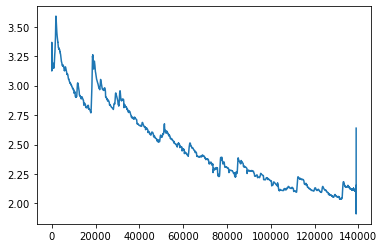

In [9]:
plt.plot(eda)

# Processing 

In [3]:
def windowSegments(signal:pd.DataFrame, fs:float, window_size_sec:int, signal_col:str='ecg_'):
    """
    perform cropped signals of window_size seconds for the whole signal
    overlap input is in percentage of window_size
    window_size is in seconds """
    
    window_size = fs * window_size_sec
    start = 0
    counter = 10
    signal.reset_index(inplace=True, drop=False)
    while(start+window_size <= len(signal)):
        signal.loc[start:start+window_size, 'index'] = counter
        start = start + window_size
        counter += 10
    
    return signal[:start+1].copy()

In [4]:
def labelMean(signal:pd.DataFrame, window_size:int):
    """
    perform cropped signals of window_size seconds for the whole signal
    overlap input is in percentage of window_size
    window_size is in seconds """
    
    # start = 0
    # counter = 10
    signal.reset_index(inplace=True, drop=False)
    for x in range(0, 54, 6):
        signal.loc[x:x+6, 'index'] = np.round(signal.iloc[x:x+6]['label'].mean())
    signal.rename(columns={'index':'meanLabel'}, inplace=True)    
    return signal

In [5]:
# combining ECG and EDA into signle file and then combining the experiments into a single file
# normalize based on subject instead of experiment.

readPath = r'X:/Thesis/matb2/ECG_EDA'
listDirs = os.listdir(readPath)
exp_id = ['exp_0', 'exp_1', 'exp_2', 'exp_3']
labelPath = r'X:\IDEaS_2\MatBII\Data\New_Labels_2'

for subs in listDirs:
# for subs in ['1105']:
    subPath = os.path.join(readPath, subs)
    subDirs = os.listdir(subPath)
    print(subs)
    # try:
    dfLabel = pd.read_csv(os.path.join(labelPath, f'{subs}.csv'))
    # break
    dfCombine = pd.DataFrame()
    for xid in exp_id:
        labelColumns = ['time', f'{xid}', f'com_{xid}']
        ecgPath = os.path.join(subPath, f'ecg_{xid}.csv')
        edaPath = os.path.join(subPath, f'eda_{xid}.csv')
        
        try:
            dfEcg = pd.read_csv(ecgPath)
            dfEda = pd.read_csv(edaPath)

            # Combining ecg and eda into a single dataframe
            df = pd.concat([dfEcg, dfEda], axis=1)
            df.dropna(inplace=True)
            df = windowSegments(df, fs=256, window_size_sec=10)
            df.rename(columns={'index':'time'}, inplace=True)
            expLabelDF = dfLabel[labelColumns].copy()
        
            expLabelDF.columns = ['time', 'label', 'complexity']
            expLabelDF = labelMean(expLabelDF, 10)
            df = pd.merge(df.copy(), expLabelDF, on='time')
            df['exp'] = xid
            dfCombine = pd.concat([dfCombine, df], ignore_index=True)
            # break
            csv_path = r'X:\Thesis\matb2\ECG_EDA_Combined\{}'.format(subs)
            mk_dirs(csv_path)
            df.to_csv(os.path.join(csv_path, '{}.csv'.format(xid)), index=False)
        except FileNotFoundError as e:
            print('File is not present. Skipping to next!')
            continue

    if not dfCombine.empty:
        dfCombine['ECG LL-RA'] = nk.standardize(dfCombine['ECG LL-RA'])
        dfCombine['GSR Conductance CAL'] = nk.standardize(dfCombine['GSR Conductance CAL'])
        dfCombine['EDA_Tonic'] = nk.standardize(dfCombine['EDA_Tonic'])
        dfCombine['EDA_Phasic'] = nk.standardize(dfCombine['EDA_Phasic'])
        dfCombine.to_csv(os.path.join(csv_path, '{}.csv'.format(subs)), index=False)

1026
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to next!
1105
1106
1175
1194
1337
1390
1400
1419
1517
File is not present. Skipping to next!
1544
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to next!
1624
File is not present. Skipping to next!
1629
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to next!
1674
File is not present. Skipping to next!
1688
1717
File is not present. Skipping to next!
File is not present. Skipping to next!
1765
File is not present. Skipping to next!
1818
1892
1929
1933
File is not present. Skipping to next!
File is not present. Skipping to next!
1936
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to next!
File is not present. Skipping to

In [15]:
def make_window_for_ECGEDA(signal:np.ndarray, fs:float, overlap:int, window_size_sec:int) -> np.ndarray:
    """ perform cropped signals of window_size seconds for the whole signal
    overlap input is in percentage of window_size
    window_size is in seconds """
    
    window_size = fs * window_size_sec
    overlap     = int(window_size * (overlap / 100))
    start       = 0
    segmented   = np.zeros((1, window_size, signal.shape[1]), dtype = int)
    while(start+window_size <= len(signal)):
        segment     = signal[start:start+window_size]
        segment     = segment.reshape(1, len(segment), signal.shape[1])
        segmented   = np.append(segmented, segment, axis=0)
        start       = start + window_size - overlap
    return segmented[1:]

In [33]:
def make_windows_1min(df:pd.DataFrame, fs:float, overlap:int, window_size_sec:int):
    numSec = 60 #seconds
    start = 0
    windowSize = fs * numSec
    winSizeArr = fs * window_size_sec

    ecgSegments   = np.zeros((1, winSizeArr, 1), dtype = int)
    edaSegments   = np.zeros((1, winSizeArr, 3), dtype = int)
    labelSegments = []

    while(start+windowSize <= len(df)):
        dfOnemin = df[start:windowSize+start]
        start = start + windowSize
        ecgOne = dfOnemin['ECG LL-RA'].values
        ecgOne = np.expand_dims(ecgOne, axis=1)
        edaOne = dfOnemin[['GSR Conductance CAL', 'EDA_Tonic', 'EDA_Phasic']].values
        labelOne = dfOnemin['meanLabel'].mean()
        ecgArr = make_window_for_ECGEDA(ecgOne, fs, overlap, window_size_sec)
        edaArr = make_window_for_ECGEDA(edaOne, fs, overlap, window_size_sec)

        labels = [labelOne] * ecgArr.shape[0]
        ecgSegments = np.append(ecgSegments, ecgArr, axis=0)
        edaSegments = np.append(edaSegments, edaArr, axis=0)
        labelSegments = labelSegments + labels
    return ecgSegments[1:], edaSegments[1:], labelSegments

In [39]:
mainPath = r'X:\Thesis\matb2\ECG_EDA_Combined'
listDir = os.listdir(mainPath)
samplingRate=256
numSec = 60 #seconds
overlapValue = 60
windowSegLength = 10
ecgSamples = {}
edaSamples = {}
labelSamples = {}
for subs in listDir:
    csvPath = os.path.join(mainPath, f'{subs}', f'{subs}.csv')
    try:
        dfMain = pd.read_csv(csvPath)
        # consider each experiment separately
        grp = dfMain.groupby(by='exp')
        grpList = grp.groups.keys()
        ecgSegs = []
        edaSegs = []
        labelSegs = []
        for grp in grpList:
            df = dfMain.groupby(by='exp').get_group(grp)
            # selecting 1 min of session and creating overlapping samples from makewindow function
            ## selecting 1 min of session
            ecgSegments, edaSegments, labelSegments = make_windows_1min(df, samplingRate, overlapValue, windowSegLength)
            ecgSegs.append(ecgSegments)
            edaSegs.append(edaSegments)
            labelSegs.append(labelSegments)
        
        ecgSamples[subs] = ecgSegs
        edaSamples[subs] = edaSegs
        labelSamples[subs] = labelSegs
            
    except FileExistsError as e:
        print('File Not found!')

In [42]:
path_pickle = r'X:\Thesis\matb2\Processed_Data'

mk_dirs(path_pickle)

with open(os.path.join(path_pickle, 'cola_ecg.pickle'), 'wb') as handle:
    pickle.dump(ecgSamples, handle, protocol = pickle.HIGHEST_PROTOCOL)

with open(os.path.join(path_pickle, 'cola_eda.pickle'), 'wb') as handle:
    pickle.dump(edaSamples, handle, protocol = pickle.HIGHEST_PROTOCOL)

with open(os.path.join(path_pickle, 'cola_labels.pickle'), 'wb') as handle:
    pickle.dump(labelSamples, handle, protocol = pickle.HIGHEST_PROTOCOL)